Natural Language Processing (NLP) is the field of artificial intelligence that relates language to Computer Science. There are some NLP applications as follows: Auto Spelling Correction, Sentiment Analysis, Fake News Detection, Machine Translation, Question and Answering(Q&A), Chatbot, and many more...

**Introduction to Autocorrect**

Have you ever wondered about how the Autocorrect features work on the keyboard of a Smartphone? Now almost every smartphone brand regardless of its price provides an autocorrect feature in their keyboards today. 

The main purpose of this notebook, as you have seen the title so you can guess that is to build an Autocorrect Feature. Yes, it’s some kind of similar, but not the exact copy, to that of the smartphone we are using now, but this would be an implementation of Natural Language Processing on a smaller dataset like a book.

Okay, let’s understand how these autocorrect features work. In this notebook, I am going to take you through “How to build Autocorrect with Python”.

**Autocorrect using NLP With Python- How it works?**

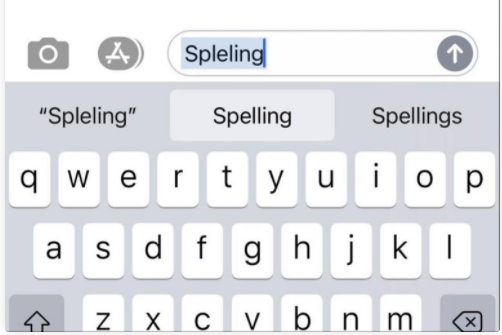

In the backdrop of machine learning, autocorrect is purely based on Natural Language Processing (NLP). As the name suggests that it is programmed in order to correct spellings and errors while typing text. So let’s see how it works?

Before I move ahead into the coding stuff let us understand “How Autocorrect works?”. Let’s assume that you have typed a word on your keyboard but if that word exists in the vocabulary of our smartphone then it will assume that you have written the right word. Okay. Now it does not matter whether you write a name, a noun, or any word that you wanted to type.

Understood this scenario? If the word exists in the history of the smartphone, it will generalize or create the word as a correct word to choose. But What if the word doesn’t exist? Okay, If the word that you have typed is a nonexisting word in the history of smartphones then the autocorrect is specially programmed to find the most similar words in the history of our smartphone as it suggests.



So let us understand the algorithm.

There are 4 key steps to building an autocorrect model that corrects spelling errors:

1. Identify Misspelled Word — Let us consider an example, how would we get to know the word “drea” is spelled incorrectly or correctly? If a word is spelled correctly then the word will be found in a dictionary and if it is not there then it is probably a Misspelled Word. Hence, when a word is not found in a dictionary then we will flag it for correction.

2. Find ‘n’ Strings Edit distance away — An edit is one of the operations which is performed on a string in order to transform it into another String, and n is nothing but the edit distance that is an edit distance like- 1, 2, 3, so on… which will count the number of edit operations that to be performed. Hence, the edit distance n tells us that how many operations are away from one string to another. Following are the different types of edits:-


              * Insert (will add a letter)
              * Delete (will remove a letter)
              * Switch (it will swap two nearby letters)
              * Replace (exchange one letter to another one)


With these four edits, we are proficient in modifying any string. So the combination of edits allows us to find a list of all possible strings that are n edits to perform.

IMPORTANT Note: For autocorrect, we take n  usually between 1 to 3 edits.

3. Filtering of Candidates — Here we want to consider only correctly spelled real words from our generated candidate list so we can compare the words to a known dictionary (like we did in the first step) and then filter out the words in our generated candidate list that do not appear in the known “dictionary”.

4. Calculate Probabilities of Words — We can calculate the probabilities of words and then find the most likely word from our generated candidates with our list of actual words. This requires word frequencies that we know and the total number of words in the corpus (also known as dictionary).


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Build an Autocorrect Feature using NLP with Python**




I hope you are now clear about what autocorrect is and how it works. Now let us see how we can build an autocorrect feature with Python for smartphones. As our smartphone uses past history to match the typed words whether it is correct or not. So here we are required to use some words to run the functionality in our Autocorrect.

So I am going to use the text from a **poetry Farsi** and **wikipedia farsi** and... to understand it practically which you can easily download from here. Now let’s get started with the task to build an autocorrect model with Python.

Note: You can use any kind of text data.

Email to access datasets : [![Email Badge](https://img.shields.io/badge/-Email-c14438?style=flat-square&logo=Gmail&logoColor=white&link=mailto:yaronhuang@foxmail.com)](mailto:parvvaresh@gmail.com)


To run this task, we are required some libraries. I am going to use libraries that are very general for machine learning. So you should be having all these libraries already installed in your system except one library. You need to install one library known as “text distance”, which can be easily installed by using the pip command.

pip install textdistance
Now let us get started with this by importing all the necessary packages, libraries and by reading our text file:

#import important library

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
def load_file(path):
  words = []
  with open(path, "r") as f:
    words = f.read()
    words = words.lower()
    words = re.findall('\w+', words)
    words_set = set(words)
    return words, words_set



def get_info(words):
  print(f"top ten words in the text are {words[0][0 : 10]}")
  print(f"total Unique words are {len(words[1])}")

words = load_file("/content/drive/MyDrive/Autocorrect Feature using NLP in Python/Fateme_Fatemeh_Ast.txt")
get_info(words)


top ten words in the text are ['و', 'ل', 'ت', 'ك', 'ن', 'م', 'ن', 'ك', 'م', 'أ']
total Unique words are 5100


In the above code, you can see that we have made a list of words and now we will build the frequency of those words.



In [ ]:
def counter_freq(words):
  counter_word = {}
  for word in words:
    if word not in counter_word:
      counter_word[word] = 1
    else:
      counter_word[word] += 1
  
  counter_words = dict(sorted(counter_word.items(), key = lambda item : item[1]))
  return counter_word


counter_word = counter_freq(words[0])

print(f"most common words is {list(counter_word.keys())[0 : 10]}")

most common words is ['و', 'ل', 'ت', 'ك', 'ن', 'م', 'أ', 'ة', 'ي', 'د']


**Relative Frequency of words**

Now here we want to get the occurrence of each word that is nothing but we have to find probabilities, which equals the Relative Frequencies of the words:

In [ ]:
total = sum(counter_word.values())

possibilities = {}

for word in counter_word.keys():
  possibilities[word] = counter_word[word] / total

**Finding Similar Words**

So we will sort similar words according to the “Jaccard Distance” by calculating the two grams Q of the words. Then next, we will return the five most similar words which are ordered by similarity and probability:

##Implementation jaccard distance

In [ ]:
def jaccard_similarity(a, b, k = 2):
  a = a.lower()
  b = b.lower()

  SA = set([a[index : index + k ]for index in range(0, len(a) - (k - 1))])
  SB = set([b[index : index + k] for index in range(0, len(b) - (k - 1))])

  intersection = SA.intersection(SB)
  union = SA.union(SB)

  jaccard__similarity = len(intersection) / len(union)
  return  jaccard__similarity

##Implementation Autocorrect

In [ ]:
def autocorrect(input_word):
  input_word = input_word.lower()
  if input_word in words[1]:
    print("Your word seems to be correct")
  else:
    sim = {}
    for word in counter_word.keys():
      sim.update({word : jaccard_similarity(word, input_word, k = 2)})
    sim = dict(sorted(sim.items(), key = lambda item : item[1]))

    recommended = pd.DataFrame()
    words_recome = list(sim.keys())
    words_recome.reverse()
    possibilities = [counter_word[word] for word in list(sim.keys())]
    possibilities.reverse()
    similarity = list(sim.values())
    similarity.reverse()
    recommended["words"] = words_recome[0 : 5]
    recommended["possibilities words"] = possibilities[0 : 5]
    recommended["similarity"] = similarity[0 : 5]
    print(recommended)

In [ ]:
autocorrect("استم")

    words  possibilities words  similarity
0     ستم                    4    0.666667
1     است                  658    0.666667
2  خواستم                    7    0.600000
3    کاست                    1    0.500000
4    ستمی                    1    0.500000
